1. Inverted Images
2. Rescaling
3. Binarization
4. Noise Removal
5. Dilation and Erosion
6. Rotation / Deskewing
7. Removing Borders
8. Missing Borders
9. Transparency / Alpha Channel

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

image_file = 'data/1.png'
img = cv.imread(image_file)

In [2]:
#https://stackoverflow.com/questions/28816046/displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

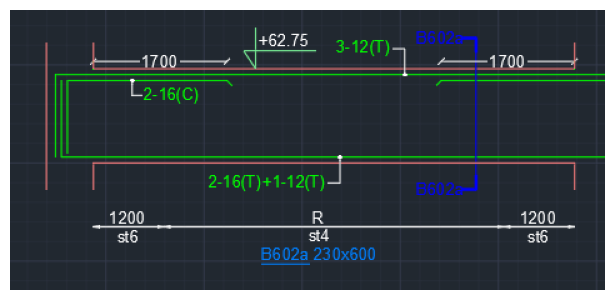

In [3]:
display(image_file)

In [28]:
def resize_keep_ar(img, scale=1.0):
    h,w = img.shape[:2]
    return cv.resize(img, (int(w*scale), int(h*scale)), interpolation=cv.INTER_CUBIC)

In [29]:
upscale = resize_keep_ar(img, scale=1.0)
cv.imwrite('data/upscaled.png', upscale)

True

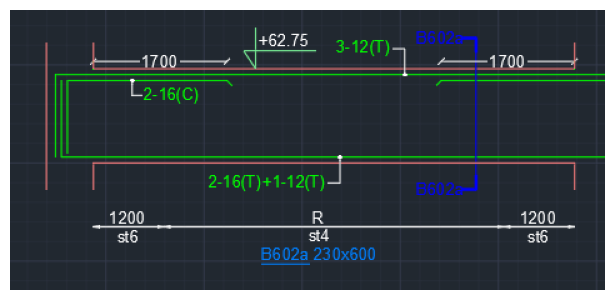

In [30]:
display('data/upscaled.png')

## Inverted Images

In [7]:
inverted_image = cv.bitwise_not(img)
cv.imwrite("temp/1.png", inverted_image)

True

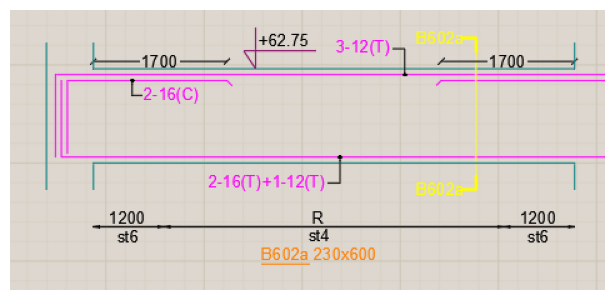

In [8]:
display("temp/1.png")

## Rescaling

## Binarization

In [9]:
def grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [10]:
gray_image = grayscale(img)
cv.imwrite("temp/gray.jpg", gray_image)

True

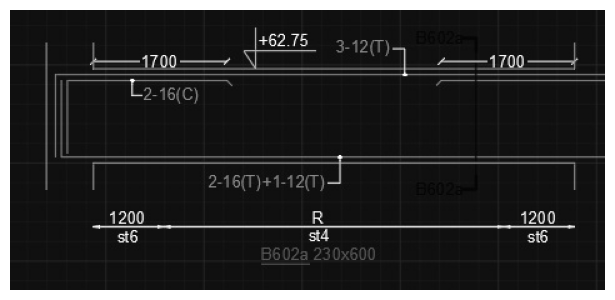

In [11]:
display("temp/gray.jpg")

In [12]:
thresh, im_bw = cv.threshold(gray_image, 100, 200, cv.THRESH_BINARY)
cv.imwrite("temp/bw_image.jpg", im_bw)

True

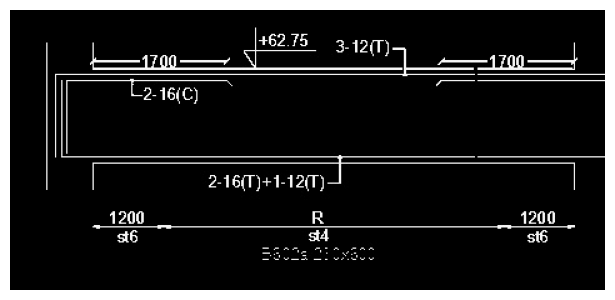

In [13]:
display("temp/bw_image.jpg")

## Noise Removal

In [14]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    image = cv.medianBlur(image, 3)
    return (image)

In [15]:
no_noise = noise_removal(im_bw)
cv.imwrite("temp/no_noise.jpg", no_noise)

True

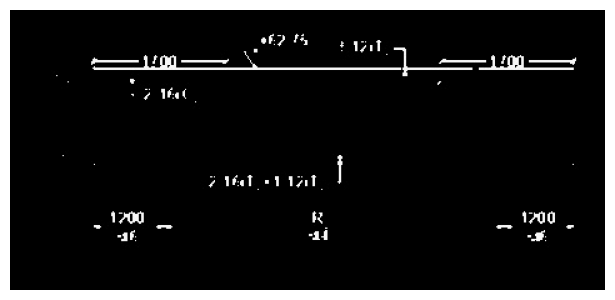

In [16]:
display("temp/no_noise.jpg")

## Dilation and Erosion

In [17]:
def thin_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [18]:
eroded_image = thin_font(no_noise)
cv.imwrite("temp/eroded_image.jpg", eroded_image)

True

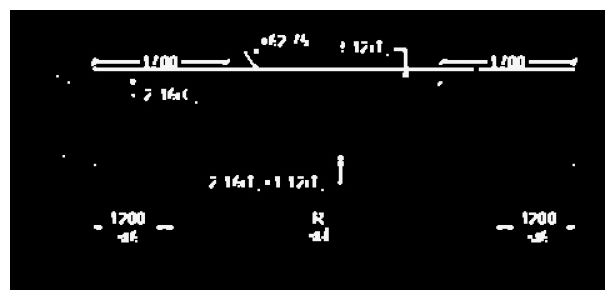

In [19]:
display("temp/eroded_image.jpg")

In [20]:
def thick_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [21]:
dilated_image = thick_font(no_noise)
cv.imwrite("temp/dilated_image.jpg", dilated_image)

True

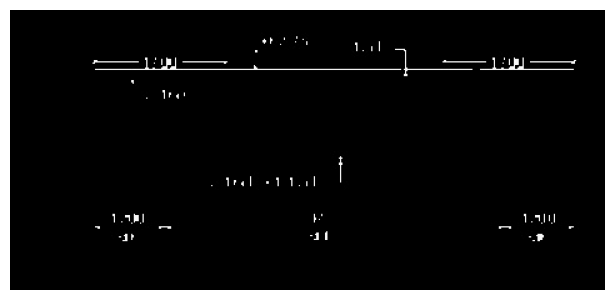

In [22]:
display("temp/dilated_image.jpg")

## Rotation / Deskewing

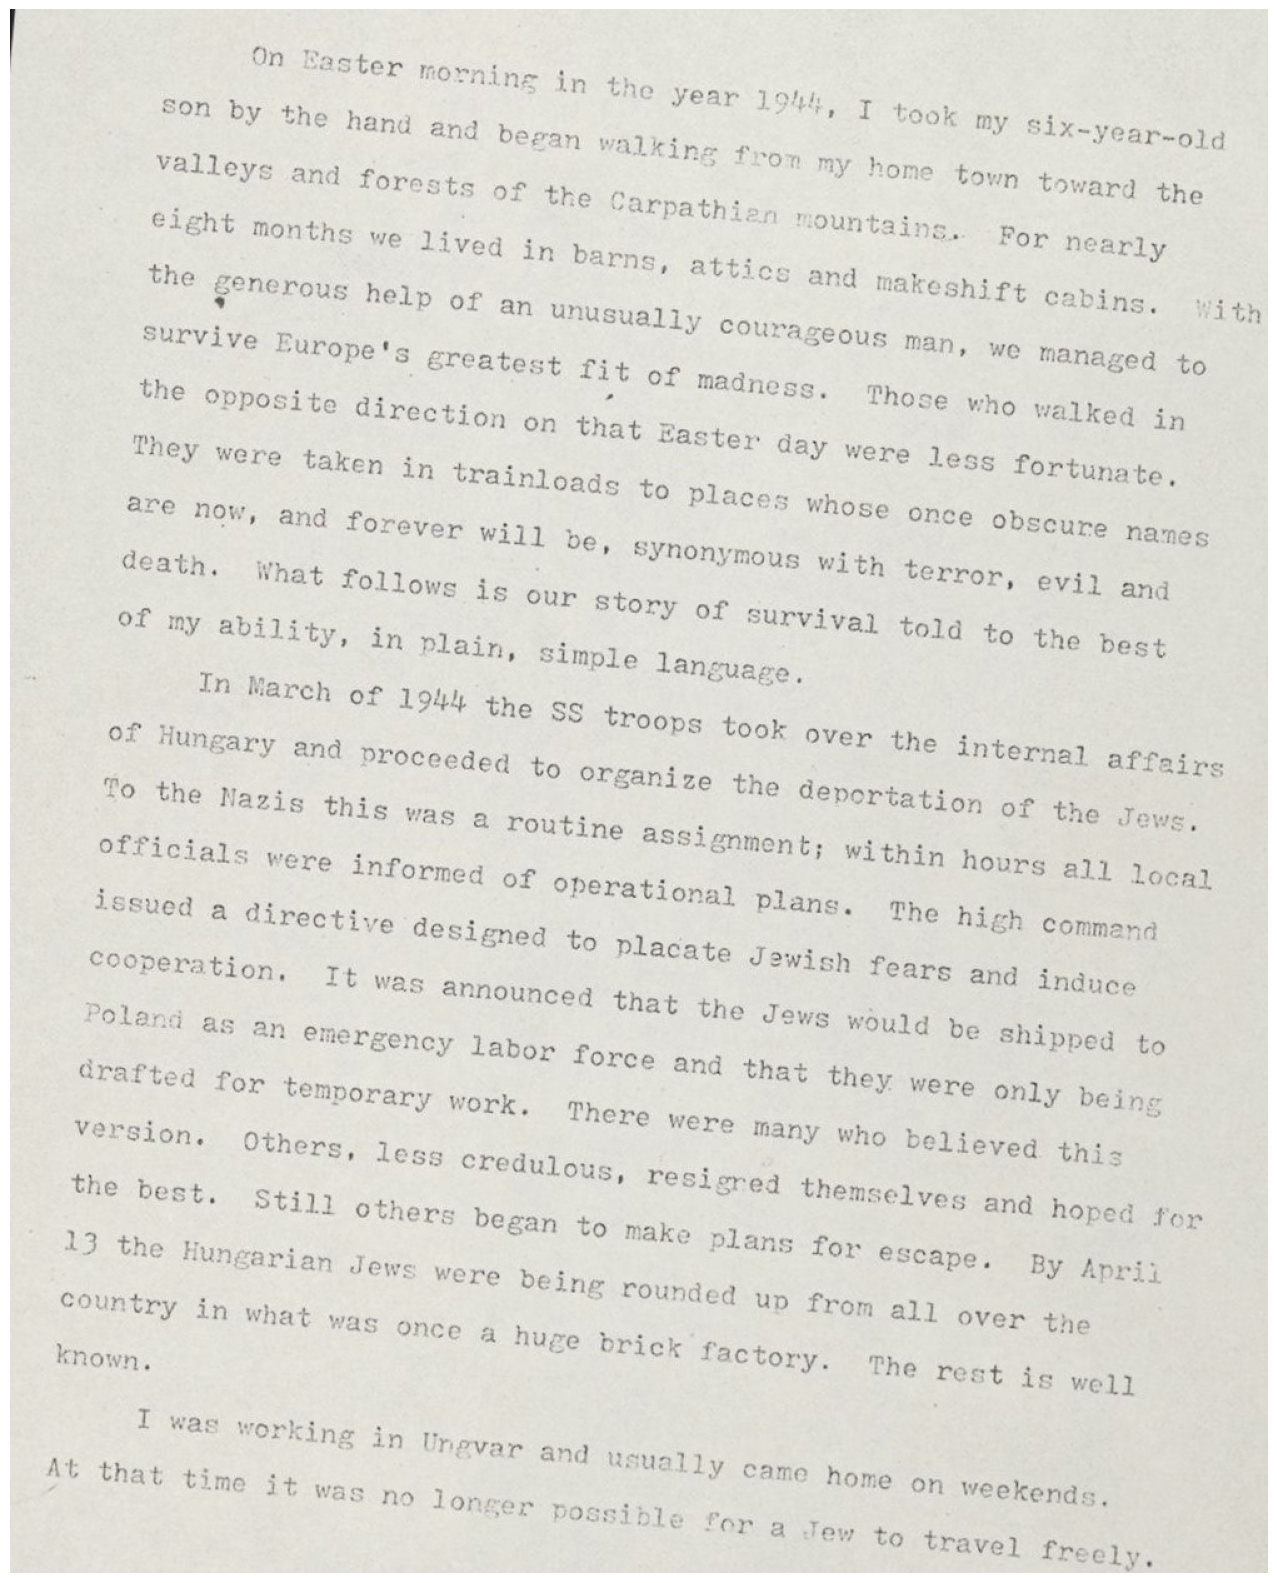

In [23]:
new = cv.imread("data/page_01_rotated.JPG")
display("data/page_01_rotated.JPG")

In [24]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv.cvtColor(newImage, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (9, 9), 0)
    thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (30, 5))
    dilate = cv.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv.findContours(dilate, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv.contourArea, reverse = True)
    for c in contours:
        rect = cv.boundingRect(c)
        x,y,w,h = rect
        cv.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv.minAreaRect(largestContour)
    cv.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv.warpAffine(newImage, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)
    return newImage

In [25]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [26]:
fixed = deskew(new)
cv.imwrite("temp/rotated_fixed.jpg", fixed)

28


True

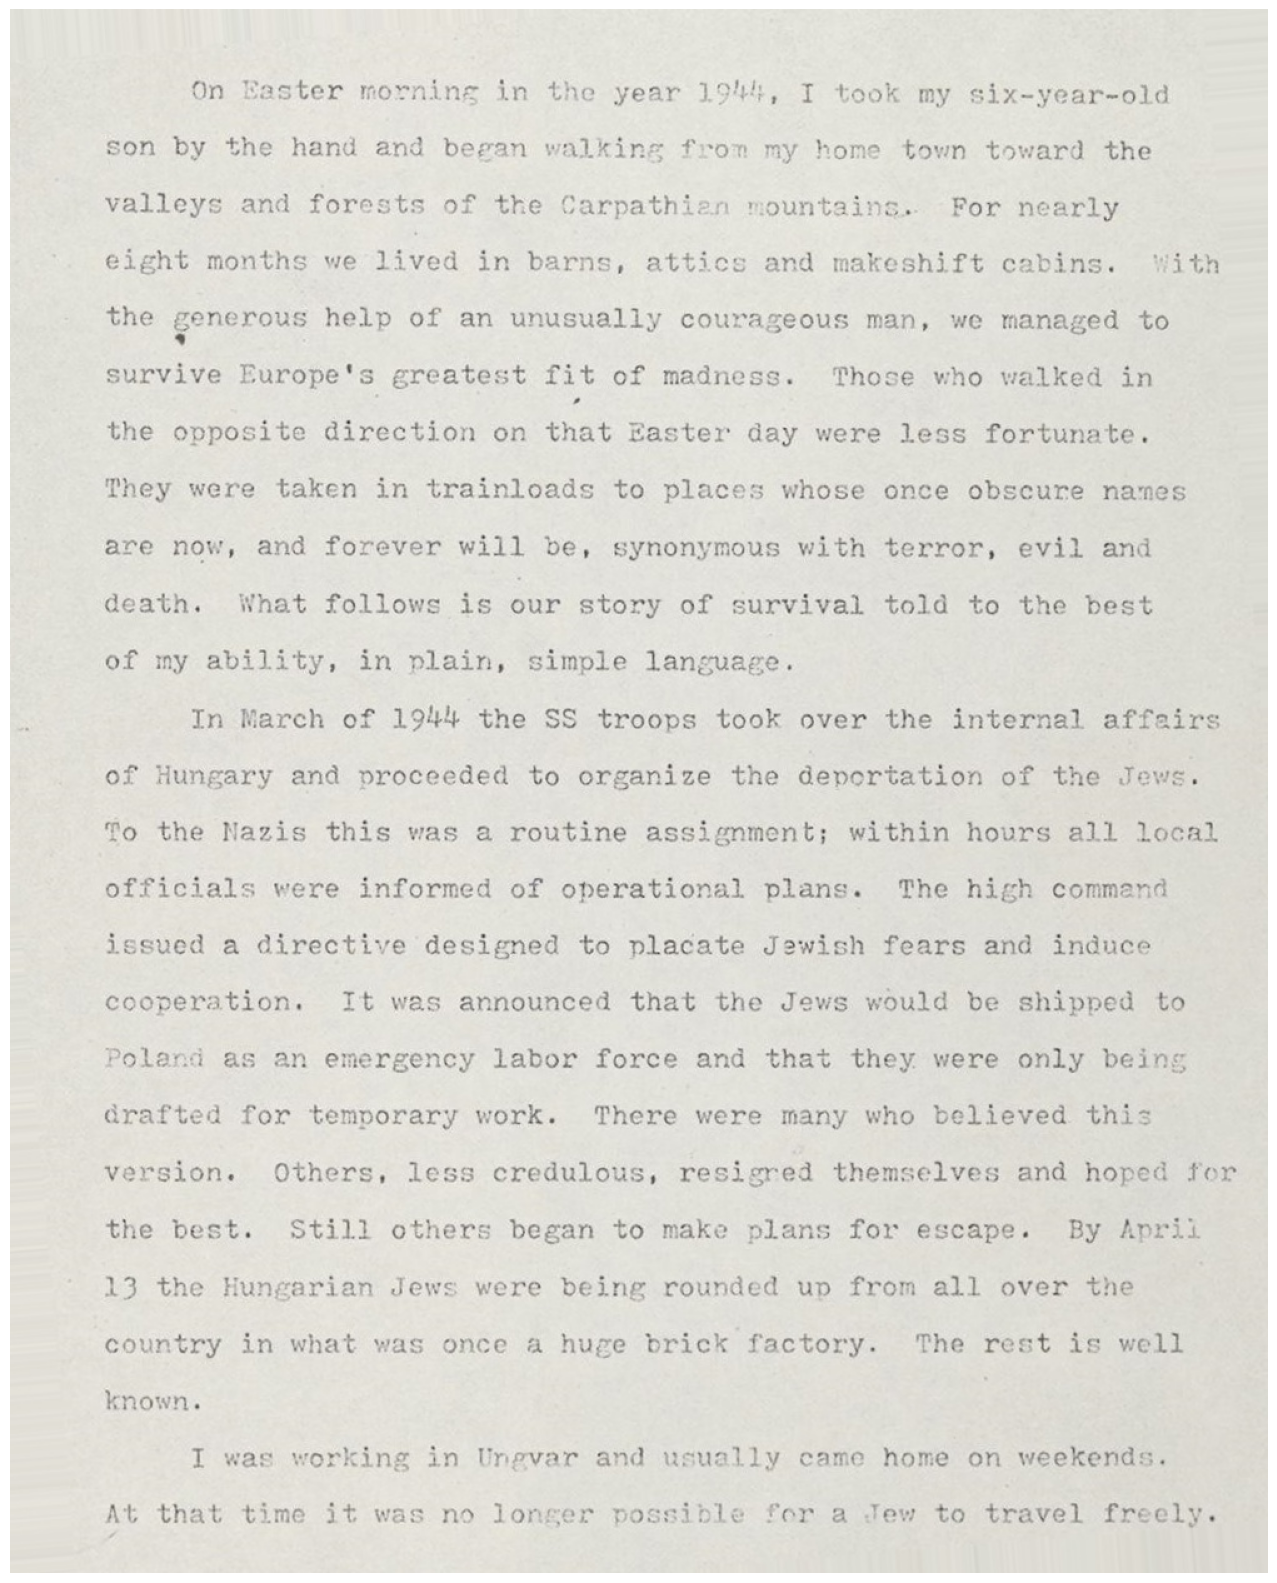

In [27]:
display("temp/rotated_fixed.jpg")